In [1]:
#In this file we will read the ultra HQ F3 data file
#and use it to plot the determinant condition 
# 1 + F3iso/N * K3iso with a fixed K3iso 
# N is the normalization squared 

import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
from scipy.optimize import curve_fit
import scipy.interpolate
import pandas as pd
import plotly.validators.scatter.marker


In [43]:
def QC3_test_one_parameter(K3iso, EcmR, F3iso, sqrtN):
    QC3 = np.zeros((len(EcmR)))
    
    for i in range(len(F3iso)):
        N = sqrtN[i]*sqrtN[i]
        QC3[i] = 1.0/F3iso[i] + K3iso 

    return QC3 

def QC3_test_two_parameter(K3iso_0, K3iso_1, EcmR, F3iso, sqrtN):
    QC3 = np.zeros((len(EcmR)))
    
    for i in range(len(F3iso)):
        N = sqrtN[i]*sqrtN[i]
        K3iso = K3iso_0 + EcmR[i]*EcmR[i]*K3iso_1
        QC3[i] = 1.0/F3iso[i] + K3iso 

    return QC3 

In [38]:
def QC3_plotter(EcmR, QC3, spec_Ecm, non_int, x_min, x_max, y_min, y_max):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    ax.plot(EcmR,QC3, linewidth=2, zorder=4)
    ax.scatter(non_int,np.zeros((len(non_int))), marker='o', s=100, linewidth=2,edgecolor="green", facecolor='white',zorder=7,label="non-int")
    ax.scatter(spec_Ecm,np.zeros((len(spec_Ecm))), marker='o', s=50, linewidth=2,edgecolor="red", facecolor='white',zorder=7,label="KKpi spec")
    ax.axhline(y=0,linestyle='--',color='black',zorder=2)

    ax.legend()
    
    fig.tight_layout()
    plt.draw()
    

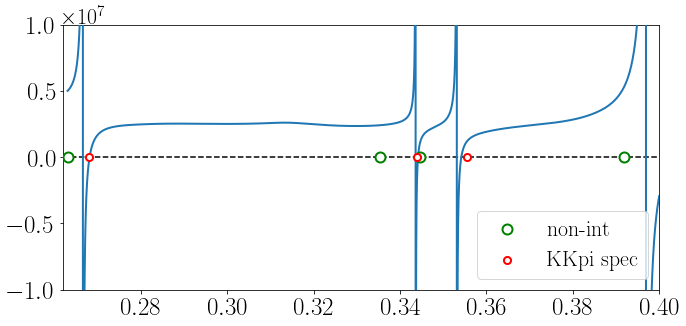

In [42]:
# First we work with the rest frame data P=000
plt.rcParams.update({'font.size': 22})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

F3file = "ultraHQ_F3_for_pole_KKpi_L20_nP_000.dat"
(En, EcmR, norm, F3, 
     F2, G, K2i, H) = np.genfromtxt(F3file, unpack=True)

KKpi_spectrum_file_drive = "/Users/digonto/GitHub/3body_quantization/lattice_data/KKpi_interacting_spectrum/Three_body/L_20_only/"

KKpi_spectrum_file = KKpi_spectrum_file_drive + "KKpi_spectrum.000_A1m"
(spec_L, spec_Ecm, spec_Ecm_err1, spec_Ecm_err2) = np.genfromtxt(KKpi_spectrum_file, unpack=True)

non_int_file_drive1 = "/Users/digonto/GitHub/3body_quantization/test_files/L20_3body_nonint_spec_points/"
non_int_spectrum_file = non_int_file_drive1 + "3body_non_int_points_using_c_code_L20_P000.dat"

non_int = np.genfromtxt(non_int_spectrum_file, unpack=True)

K3iso = 1400000
QC3 = QC3_test_one_parameter(K3iso,EcmR, F3, norm)

xmin = 0.262
xmax = 0.4
ymin = -10000000.51
ymax = 10000000.5
QC3_plotter(EcmR,QC3,spec_Ecm,non_int,xmin,xmax,ymin,ymax)

#Two parameter K3iso 
K3iso0 = 1400000
K3iso1 = 100
QC3 = QC3_test_two_parameter(K3iso0,K3iso1,EcmR, F3, norm)
